In [2]:
import cv2
import numpy as np
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
from PIL import Image

## 读取图片并提取前景

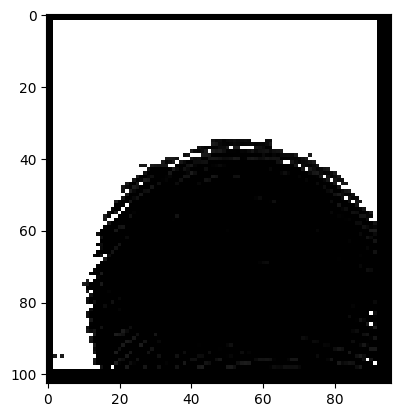

In [16]:
dataset_dir = "D:/desktop/1/z/SOCOFing/Real".rstrip('/')
src_d = r"D:\desktop\1\z\SOCOFing\Real/16__M_Right_ring_finger.BMP"
image_d = src_d[len(dataset_dir) + 1:]

image = cv2.imread(src_d)

newim = image.copy()
if len(image.shape) > 2: 
    newim = cv2.cvtColor(newim, cv2.COLOR_BGR2GRAY)
    
threshold_global_otsu = threshold_otsu(newim) #确定阈值
im_front = np.asarray((newim > threshold_global_otsu), dtype='uint8') # 0和1，区分背景和指纹
# ret, img = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)
gray_img = newim * im_front

gray_equ = cv2.equalizeHist(gray_img)
img_equ = cv2.equalizeHist(newim)


plt.imshow(gray_equ, cmap = plt.cm.gray)


## 腐蚀和膨胀

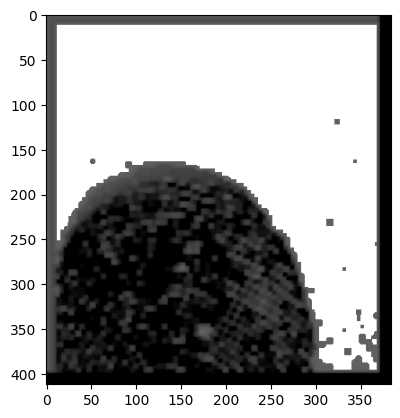

In [66]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 4))
im1 = cv2.morphologyEx(img_equ, cv2.MORPH_OPEN, kernel) # 开运算
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 4))
im2 = cv2.morphologyEx(im1, cv2.MORPH_CLOSE, kernel) # 闭运算
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
im3 = cv2.dilate(im2, kernel) #腐蚀
plt.imshow(im3, cmap = plt.cm.gray)

## 截取原图

In [27]:
final_mask = Image.fromarray(im3)
component_count, component_mask = cv2.connectedComponents(im3) # 连通域数目和每个像素的标签
label, label_frq = np.unique(component_mask, return_counts=True) # 标签和每个标签的频数
needed_labels = label[label_frq.argsort()[-2:][::-1]] # 频数最大的两个区域并反转
X_sum, Y_sum, final_label = np.sum(im3[np.where(component_mask == needed_labels[0])]), np.sum(im3[np.where(component_mask == needed_labels[1])]), 0
# 像素值求和，X_sum是频数最高像素值的和，Y_sum是频数第二高像素值的和
if X_sum > Y_sum:
    final_label = needed_labels[0]
else:
    final_label = needed_labels[1]
# final_label是指纹对应的label
X_idx, Y_idx = np.where(component_mask == final_label)[0], np.where(component_mask == final_label)[1]
# 获取不同label区域的坐标
(x_min, y_min, x_max, y_max) = (np.min(X_idx), np.min(Y_idx), np.max(X_idx), np.max(Y_idx))
#不同label区域的最大最小坐标
im4 = im3[x_min:x_max, y_min:y_max] # 取标签1.2的所在区域
im = image[max(x_min-7, 0):min(x_max+7, image.shape[0]), max(y_min-7, 0):min(y_max+7, image.shape[1])]

final_im = Image.fromarray(im)

cropped_mask = Image.fromarray(im)  

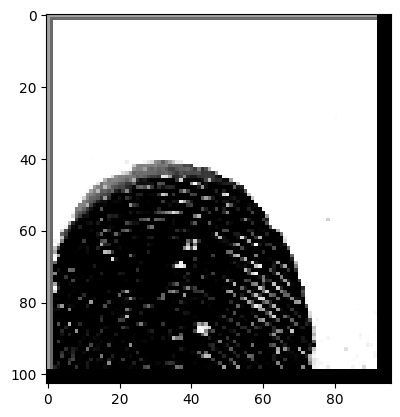

In [28]:
plt.imshow(final_im)

In [ ]:
plt.imshow(final_im)